# 미세각질 Imagenet 모델 중 EfficientNetB2를 제외한 나머지 결과

In [1]:
import os
os.getcwd()

'/content'

구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


npz파일 생성

In [2]:
import os, glob, random
import numpy as np
from PIL import Image

datapath = "/content/drive/MyDrive/data/corneous" # 훈련 데이터 경로
output = "corneousLoss.npz"  # 저장할 파일 이름

image_w = 256
image_h = 256

x = []                    # Image
y = []                    # Label

# 폴더에 있는 이미지 데이터 읽기
# path를 통해 경로를 설정해주고, label을 통해 해당 이미지에 대한 라벨값을 지정해준다
# 예를 들어 양호 카테고리 이미지들은 0을 받아 지정해준다.
def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    
    # 이미지 데이터 처리
    # 함수를 호출할 때마다 반복을 통해 데이터를 x,y 배열에 계속 집어넣는다.
    num = 0
    max_photo = 534            # normal, mild, moderate, severe 중 가장 작은 이미지 개수로 설정
    for i, f in enumerate(files):
        if num >= max_photo:   # max_photo 값보다 커질 경우, 루프 벗어남.
            break
        num += 1
        
        # 이미지 데이터 읽기
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))  # 이미지 사이즈 256 * 256 설정
        img = np.asarray(img)        # RGB 색상값 0부터 1까지의 실수값 변환
        x.append(img)
        y.append(label)
        
        if i % 100 == 0:
            print("run: " + f)

# 바꾼 코드 !!
# 폴더에 있는 이미지 데이터 읽고 레이블 지정
# 반복문을 통해 양호, 경증, 중등도, 중증 이미지를 가져온다.
# 또한 glob_files 함수를 호출할 때 각각의 라벨을 지정한다.
# i = 0 -> 양호, ... i = 3 -> 중증
categories = ['normal', 'mild', 'moderate', 'severe']
def main():
    for i in range(4): 
        file = datapath + "/" + categories[i]
        print(categories[i] + " 실행")
        glob_files(file, i)
        
    # 파일로 저장
    np.savez(output, x=x, y=y) # Numpy 압축파일로 저장
    print(str(len(x)) + "개의 이미지를 저장했습니다. 파일명: " + output)
    
# 메인 프로그램 실행
# main() 함수를 실행하고 그 안에 있는 glob_files()함수를 통해 양호 경증 중증도 중증 순으로 함수를 다시 호출한다
# glob_files()함수를 통해 x, y배열에 데이터를 다 집어넣고
# np.savez를 통해 .npz형식의 데이터 배열 파일을 저장하게 된다.
if __name__ == '__main__':
    main()

normal 실행
run: /content/drive/MyDrive/data/corneous/normal/3365_A2LEBJJDE00106D_1609753055935_3_TH.jpg
run: /content/drive/MyDrive/data/corneous/normal/3858_A2LEBJJDE00076B_1603177473658_3_TH.jpg
run: /content/drive/MyDrive/data/corneous/normal/0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg
run: /content/drive/MyDrive/data/corneous/normal/4659_A2LEBJJDE001349_1605690204489_5_RH.jpg
run: /content/drive/MyDrive/data/corneous/normal/3858_A2LEBJJDE00076B_1603784279978_4_LH.jpg
run: /content/drive/MyDrive/data/corneous/normal/3046_A2LEBJJDE00089J_1604727533726_3_TH.jpg
mild 실행
run: /content/drive/MyDrive/data/corneous/mild/6367_A2LEBJJDE00038L_1604197204603_4_LH.jpg
run: /content/drive/MyDrive/data/corneous/mild/2688_A2LEBJJDE00115E_1604732316534_3_TH.jpg
run: /content/drive/MyDrive/data/corneous/mild/3365_A2LEBJJDE00106D_1603077184799_3_TH.jpg
run: /content/drive/MyDrive/data/corneous/mild/6609_A2LEBJJDE00127T_1603374515559_3_TH.jpg
run: /content/drive/MyDrive/data/corneous/mild/3339_A2LEBJJD

이미지 확인

<function matplotlib.pyplot.show(close=None, block=None)>

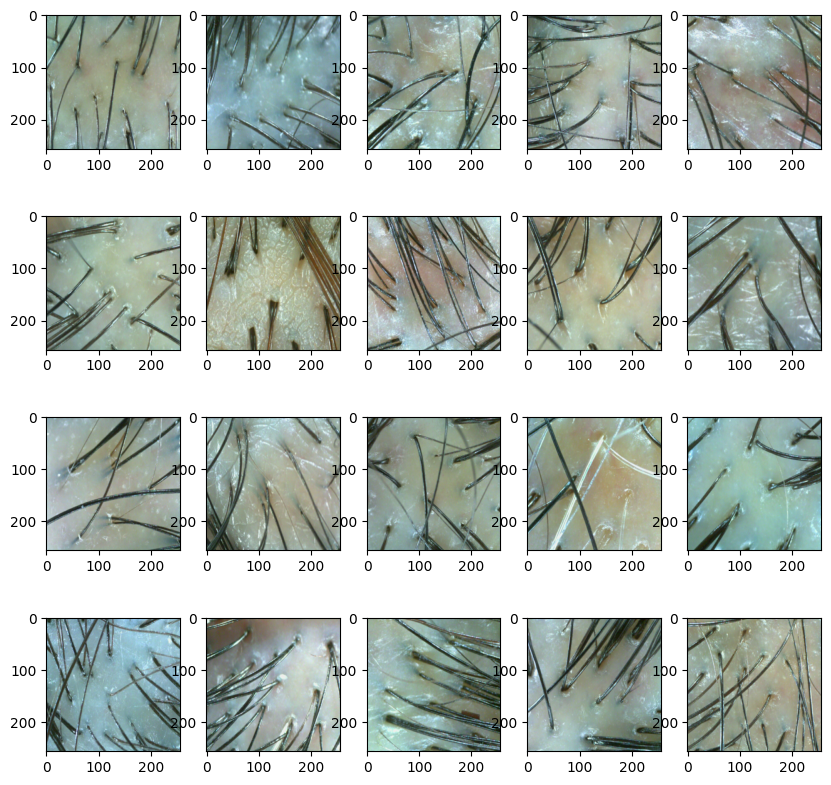

In [3]:
import matplotlib.pyplot as plt

# 이미지 확인
# np.load를 통해 배열 데이터를 가져오고 이를 photos변수에 집어넣는다
# photos 배열 데이터의 x= 이미지 y= 라벨을 각각 집어넣는다.
photos = np.load("corneousLoss.npz")
x = photos["x"]
y = photos["y"]

# 시작 인덱스 설정
idx = 0  

# subplot으로 인덱스로 설정한 이미지 출력
# plt.figure을 통해 최초 창의 크기를 가로 세로 9인치로 설정한다.
# 20번 반복해서 4행 5열 i+1번째에 이미지를 imshow를 통해 가져와서 출력한다.
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x[i+idx])
    
plt.show

데이터셋 구분 및 실행

In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# npz 파일을 불러와 데이터셋 구분
def preprocessing(file, hairClass):
    global shape, x_train, y_train, x_val, y_val, x_test, y_test
    rows = 256                 # 이미지 높이
    cols = 256                 # 이미지 너비
    color = 3                  # 이미지 색공간
    shape = (rows, cols, color)
    hairClass = hairClass      # 출력 데이터 수
    
    # 사진 데이터 읽기
    # 데이터를 읽은 후 해당 파일의 x(이미지)는 x에  y(라벨 0,1,2,3)은 y에 넣는다.
    photo = np.load(file)
    x = photo['x']
    y = photo['y']
    
    # 데이터 1차원에서 3차원 배열로 변환 및 정규화
    x = x.reshape(-1, rows, cols, color)
    x = x.astype('float32') / 255
    
    # 레이블 One-Hot Encoding 변환
    y = to_categorical(y.astype('int32'), hairClass)
    
    # 전체 데이터셋 -> 학습 데이터셋과 테스트 데이터셋으로 구분
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.2)
    
    # 훈련 데이터셋 -> 학습 데이터셋과 검증 데이터셋으로 구분
    # 만약 train_test_split의 test_size속성이 생략되어 있다면 해당 default값은 0.25이다.
    # 만약 train_test_split의 shuffle속성이 생략되어 있다면 해당 default값은 True이다.
    # 즉 데이터셋를 알아서 섞게 된다.
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                      test_size=0.2)
    
    # 데이터셋 확인
    print(x_train.shape, y_train.shape)
    print(x_val.shape, y_val.shape)
    print(x_test.shape, y_test.shape)

# 데이터셋 구분 실행
# preprocessing을 통해 
preprocessing('corneousLoss.npz', 4)

(1366, 256, 256, 3) (1366, 4)
(342, 256, 256, 3) (342, 4)
(428, 256, 256, 3) (428, 4)


# ImageNet: 모델 정의

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, Xception, EfficientNetB2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam

# trainable 속성을 False로 설정하면 Imagenet 모델의 사전 학습된 가중치를 사용하여 모델의 예측을 생성한다.
# trainable 속성을 True로 설정하면 fine tuning을 수행할 수 있다.

# include_top 속성을 False로 설정하면 기존 Imagenet 모델의 Fully Connected Layer를 제외하고 가져온다.
# include_top 속성을 True로 설정하면 Fully Connected Layer를 포함한 Imagenet 모델을 전부 가져온다.

# VGG16 모델
def def_VGG16(shape, hairClass):
  pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_vgg.trainable = False
  model = Sequential()
  model.add(pre_trained_vgg)

  # 레이어 추가(재정의)
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dense(4096, activation='relu'))
  model.add(Dense(hairClass, activation='softmax'))
  
  # 모델 요약
  model.summary()

  # 모델 컴파일 
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
  
  return model

# ResNet50 모델
def def_ResNet(shape, hairClass):
  pre_trained_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_resnet.trainable = False
  model = Sequential()
  model.add(pre_trained_resnet)

  # 레이어 추가(재정의)
  model.add(Flatten())
  model.add(Dense(hairClass, activation='softmax'))

  # 모델 요약
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])  
  
  return model

# InceptionV3 모델
def def_InceptionV3(shape, hairClass):
  pre_trained_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_inceptionv3.trainable = False
  model = Sequential()
  model.add(pre_trained_inceptionv3)

  # 레이어 추가(재정의)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(hairClass, activation='softmax'))
  
  # 모델 요약
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])
  
  return model

# Xception 모델
def def_Xception(shape, hairClass):
  pre_trained_Xception = Xception(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_Xception.trainable = False
  model = Sequential()
  model.add(pre_trained_Xception)

  # 레이어 추가(재정의)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(hairClass, activation='softmax'))

  # 모델 요약 
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])
  
  return model

# EfficientNetB2 모델
def def_EfficientNetB2(shape, hairClass):
  pre_trained_EfficientNetB2 = EfficientNetB2(weights='imagenet', include_top=False, input_shape=shape)
  pre_trained_EfficientNetB2.trainable = False
  model = Sequential()
  model.add(pre_trained_EfficientNetB2)

  # 레이어 추가(재정의)
  model.add(GlobalAveragePooling2D())
  model.add(Dropout(0.3))
  model.add(Dense(hairClass, activation='softmax'))

  # 모델 요약 
  model.summary() 

  # 모델 컴파일
  model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])
  
  return model

모델 학습

In [8]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

def model_train(x_train, y_train, x_val, y_val, modelFunc, modelName):
  # 모델 생성
  # shape는 데이터셋 구분시 초기화된 변수이다. -> (256, 256, 3)
  model = modelFunc(shape, 4)

  # 모델이 저장될 경로 체크
  model_dir = './model'

  if not os.path.exists(model_dir): # 해당 위치에 경로(폴더)가 없으면
    os.mkdir(model_dir) # 변수명 model_dir로 생성시킴

  # 폴더 경로 변경
  os.chdir('/content/model')

  # 콜백 함수 설정
  # ModelCheckpoint란 모델을 저장할 때 사용하는 콜백 함수이다.
  # filepath -> 모델 저장 경로
  # monitor -> 모델 저장 시 기준이 되는 값으로 해당 코드에서는 val_loss을 저장하게 된다
  # verbose -> 1=저장되었다는 코맨트 0=코맨트 없음
  # save_besr_only -> monitor되는 값을 기준으로 가장 좋은 값을 저장한다.
  checkpoint = ModelCheckpoint(f'corneous_{modelName}.h5', monitor='val_loss', verbose=1, save_best_only=True)

  # EarlyStopping이란 특정 시점에서 훈련을 멈추는 콜백 함수이다.
  # monitor -> 모니터링할 값
  # mode -> 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정한다. 
  # monitor에서 설정한 항목이 val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min을 설정한다. 입력하지 않으면 auto로 설정해 알아서 판단해준다.
  # patience -> 20번 이상 변동 없으면 중지시킨다. -> 일단 다 출력해본다.
  early_stopping = EarlyStopping(monitor='val_loss', patience=20)

  # 모델 훈련
  history = model.fit(x_train, y_train,
                  batch_size=32,
                  epochs=20,
                  verbose=1,
                  validation_data=(x_val, y_val),
                  callbacks=[early_stopping, checkpoint])
  
  # 모델 저장
  model.save(f'corneous_{modelName}.h5')

  return model, history

In [9]:
model_VGG16, history_VGG16 = model_train(x_train, y_train, x_val, y_val, def_VGG16, 'VGG16')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 4096)              134221824 
                                                                 
 dense_4 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_5 (Dense)             (None, 4)                 16388     
                                                                 
Total params: 165,734,212
Trainable params: 151,019,524
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
43/43 [=============

In [10]:
model_ResNet, history_ResNet = model_train(x_train, y_train, x_val, y_val, def_ResNet, 'ResNet')

94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 4)                 524292    
                                                                 
Total params: 24,112,004
Trainable params: 524,292
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/20
43/43 [==============================] - ETA: 0s - loss: 9.6998 - accuracy: 0.2833
Epoch 00001: val_loss improved from inf to 2.16961, saving model to corneous_ResNet.h5
43/43 [==============================] - 15s 216ms/ste

In [11]:
model_Inception, history_Inception = model_train(x_train, y_train, x_val, y_val, def_InceptionV3, 'Inception')

87910968/87910968 [==============================] - 3s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_7 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/20
43/43 [==============================] - ETA: 0s - loss: 1.2946 - accuracy: 0.3917
Epoch 00001: val_loss improved from inf to 1.14619, saving model to corneous_

In [12]:
model_Xception, history_Xception = model_train(x_train, y_train, x_val, y_val, def_Xception, 'Xception')

83683744/83683744 [==============================] - 3s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 20,869,676
Trainable params: 8,196
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/20
43/43 [==============================] - ETA: 0s - loss: 1.2601 - accuracy: 0.4187
Epoch 00001: val_loss improved from inf to 1.11577, saving model to corneous_

파일 저장 오류
[오류 해결 링크](https://discuss.tensorflow.org/t/using-efficientnetb0-and-save-model-will-result-unable-to-serialize-2-0896919-2-1128857-2-1081853-to-json-unrecognized-type-class-tensorflow-python-framework-ops-eagertensor/12518/12)

In [13]:
model_EfficientNet, history_EfficientNet = model_train(x_train, y_train, x_val, y_val, def_EfficientNetB2, 'EfficientNet')

31790344/31790344 [==============================] - 2s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 8, 8, 1408)       7768569   
                                                                 
 global_average_pooling2d_2   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense_9 (Dense)             (None, 4)                 5636      
                                                                 
Total params: 7,774,205
Trainable params: 5,636
Non-trainable params: 7,768,569
_________________________________________________________________
Epoch 1/20
43/43 [=======================

TypeError: ignored

history 확인

In [15]:
print(history_Xception.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
import matplotlib.pyplot as plt

def model_plot(history, modelName):
  # loss
  y_loss = history.history['loss']
  y_vloss = history.history['val_loss']
  
  x_len = range(1,len(y_loss) + 1)

  fig = plt.figure(figsize=(10, 4))
  ax = fig.add_subplot(1, 2, 1)

  ax.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
  ax.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Loss')
  ax.set_title(modelName + ': train&val loss')
  ax.legend()

  # accuracy
  y_acc = history.history['accuracy']
  y_vacc = history.history['val_accuracy']
  
  x_len = range(1, len(y_acc) + 1)
  ax = fig.add_subplot(1, 2, 2)
  ax.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
  ax.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Accuracy')
  ax.set_title(modelName + ': train&val accuracy')
  ax.legend()

  plt.tight_layout()
  plt.show()

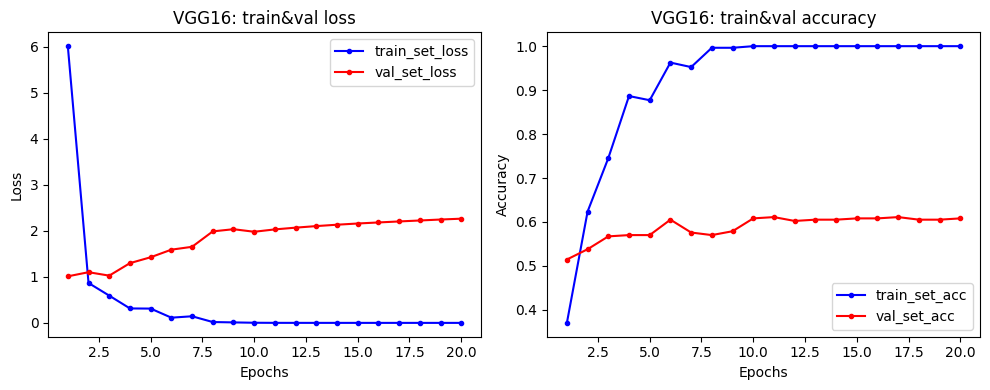

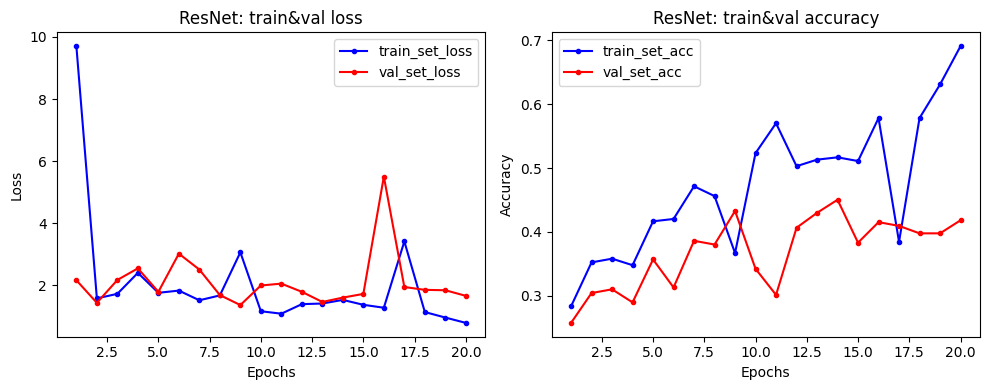

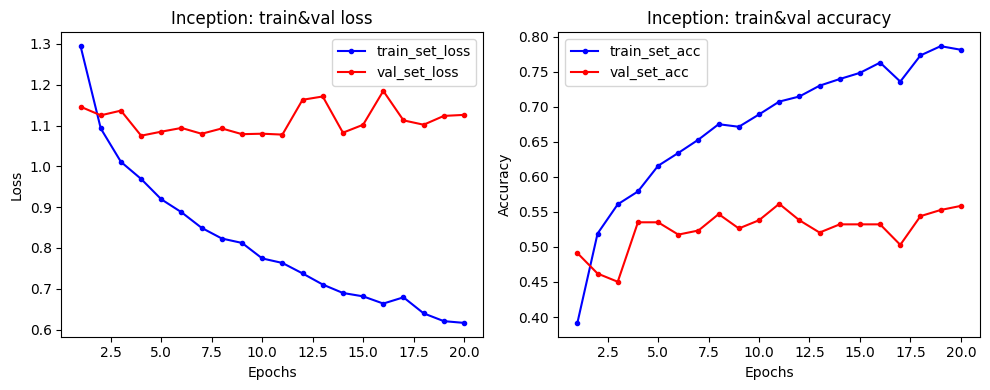

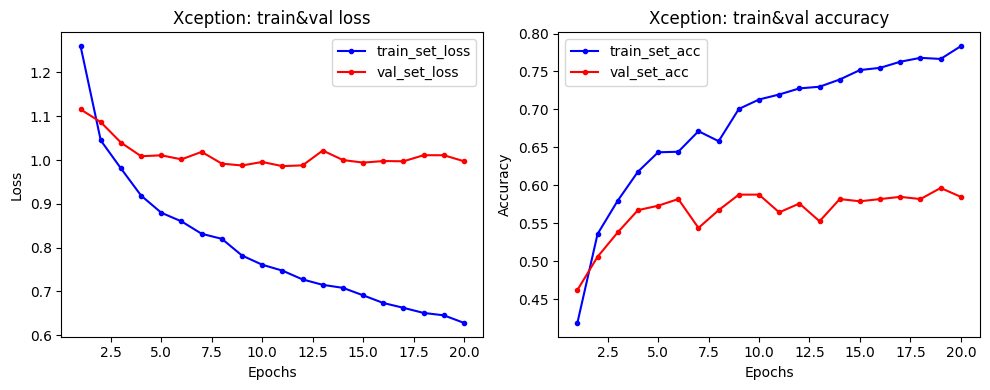

In [22]:
model_history = [ history_VGG16, history_ResNet, history_Inception, history_Xception ]
model_Name = ['VGG16', 'ResNet', 'Inception', 'Xception']

for i in range(4):
  model_plot(model_history[i], model_Name[i])

# model_plot(history_VGG16, 'VGG16')
# model_plot(history_ResNet, 'ResNet')
# model_plot(history_Inception, 'Inception')
# model_plot(history_Xception, 'Xception')

## Confusion Matrix

In [30]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# history와 model을 이용한 방법
def confusionMatrix_model(model, modelName, x_test, y_test):
    # 모델을 이용해 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # softmax 확률 출력을 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Labeling
    label = ['normal', 'mild', 'moderate', 'severe']
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

    # 분류 보고서 출력
    print(classification_report(y_true, y_pred_classes))

    
# 생성된 .h5 파일을 이용하여 생성
def confusionMatrix_h5(model_path, modelName, x_test, y_test):
    
    # 모델 로드
    model = load_model(model_path)

    # 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(x_test)

    # 예측 결과를 가장 높은 확률을 가진 클래스로 변환
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # 혼동 행렬 생성
    cm = confusion_matrix(y_true, y_pred_classes)

    # 혼동 행렬 시각화
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(modelName + ' confusionMatrix')
    plt.show()

14/14 [==============================] - 2s 158ms/step


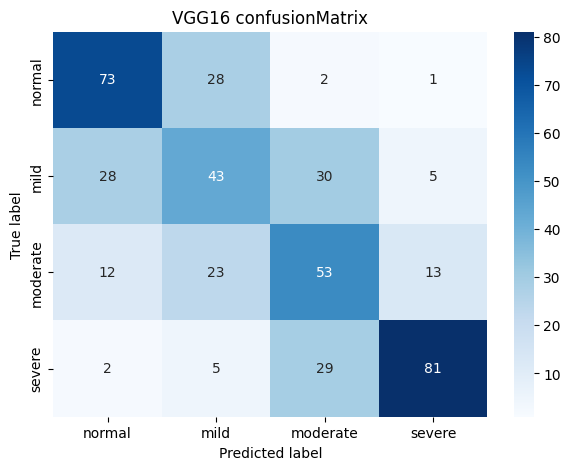

              precision    recall  f1-score   support

           0       0.63      0.70      0.67       104
           1       0.43      0.41      0.42       106
           2       0.46      0.52      0.49       101
           3       0.81      0.69      0.75       117

    accuracy                           0.58       428
   macro avg       0.59      0.58      0.58       428
weighted avg       0.59      0.58      0.59       428

14/14 [==============================] - 1s 110ms/step


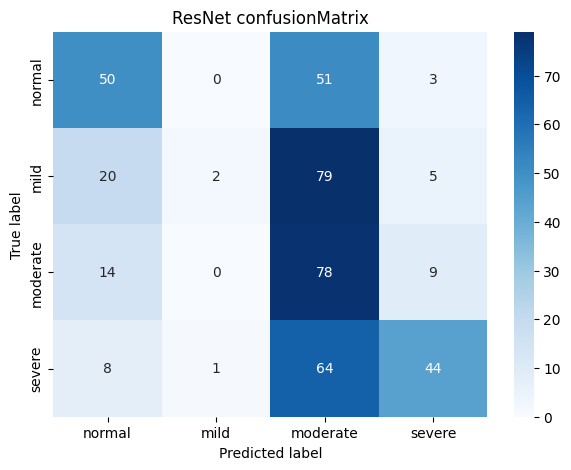

              precision    recall  f1-score   support

           0       0.54      0.48      0.51       104
           1       0.67      0.02      0.04       106
           2       0.29      0.77      0.42       101
           3       0.72      0.38      0.49       117

    accuracy                           0.41       428
   macro avg       0.55      0.41      0.36       428
weighted avg       0.56      0.41      0.37       428

14/14 [==============================] - 1s 85ms/step


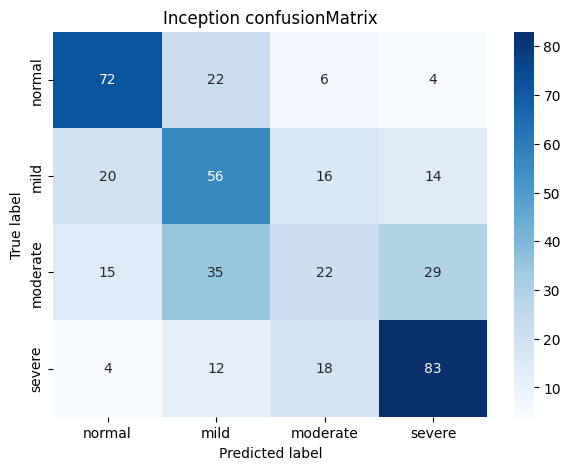

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       104
           1       0.45      0.53      0.48       106
           2       0.35      0.22      0.27       101
           3       0.64      0.71      0.67       117

    accuracy                           0.54       428
   macro avg       0.52      0.54      0.52       428
weighted avg       0.53      0.54      0.53       428

14/14 [==============================] - 2s 151ms/step


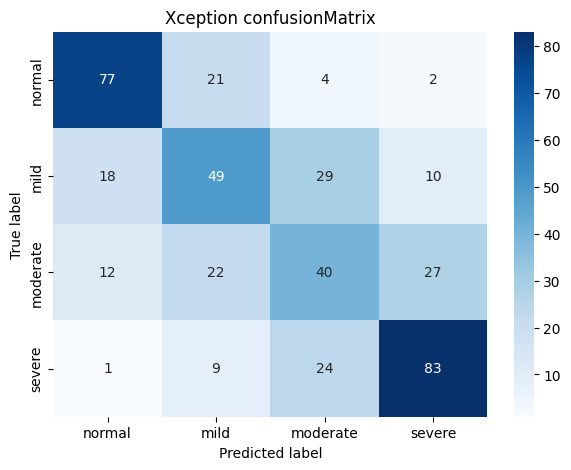

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       104
           1       0.49      0.46      0.47       106
           2       0.41      0.40      0.40       101
           3       0.68      0.71      0.69       117

    accuracy                           0.58       428
   macro avg       0.57      0.58      0.57       428
weighted avg       0.58      0.58      0.58       428



In [36]:
model_train_result = [ model_VGG16, model_ResNet, model_Inception, model_Xception ]
model_Name = ['VGG16', 'ResNet', 'Inception', 'Xception']
for i in range(4):
  confusionMatrix_model(model_train_result[i], model_Name[i], x_test, y_test)

# confusionMatrix_model(model_VGG16, x_test, y_test)
# confusionMatrix_model(model_Resnet, x_test, y_test)
# confusionMatrix_model(model_Inception, x_test, y_test)
# confusionMatrix_model(model_Xception, x_test, y_test)

model 테스트

In [34]:
def model_evaluate(model, x_test, y_test):
    test_result = model.evaluate(x_test, y_test, verbose=1)
    print("acc: ", test_result[1], 'loss: ', test_result[0])

    return test_result[1], test_result[0]

In [42]:
accuracy_VGG16 = None
accuracy_ResNet = None
accuracy_Inception = None
accuracy_Xception = None
loss_VGG16 = None
loss_ResNet = None
loss_Inception = None
loss_Xception = None

accuracy = [ accuracy_VGG16, accuracy_ResNet, accuracy_Inception, accuracy_Xception ]
loss = [ loss_VGG16, loss_ResNet, loss_Inception, loss_Xception ]
model_train_result = [ model_VGG16, model_ResNet, model_Inception, model_Xception ]

for i in range(4):
  accuracy[i], loss[i] = model_evaluate(model_train_result[i], x_test, y_test)
  print("\n")

# accuracy_VGG16, loss_VGG16 = evaluate_model(model_VGG16, x_test, y_test)
# accuracy_Resnet, loss_Resnet = evaluate_model(model_ResNet, x_test, y_test)
# accuracy_Inception, loss_Inception = evaluate_model(model_Inception, x_test, y_test)
# accuracy_Xception, loss_Xception = evaluate_model(model_Xception, x_test, y_test)

14/14 [==============================] - 2s 161ms/step - loss: 2.4394 - accuracy: 0.5841
acc:  0.5841121673583984 loss:  2.439404249191284


14/14 [==============================] - 2s 115ms/step - loss: 1.7768 - accuracy: 0.4065
acc:  0.4065420627593994 loss:  1.7768163681030273


14/14 [==============================] - 1s 94ms/step - loss: 1.0708 - accuracy: 0.5444
acc:  0.5443925261497498 loss:  1.07083261013031


14/14 [==============================] - 2s 162ms/step - loss: 0.9620 - accuracy: 0.5818
acc:  0.5817757248878479 loss:  0.9620321989059448




파일 다운로드

In [ ]:
from google.colab import files
files.download('/content/model/corneous_Inception.h5')
files.download('/content/model/corneous_ResNet.h5')
files.download('/content/model/corneous_VGG16.h5')
files.download('/content/model/corneous_Xception.h5')
files.download('/content/corneousLoss.npz')